In [1]:
# imports required libraries
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
# imports the CSV dataset 
dataset = pd.read_csv('house_data.csv')

In [3]:
#explore the data by checking the number of rows and columns
dataset.shape

(827, 3)

In [4]:
#Statistical details of the dataset
dataset.describe()

,price,surface,arrondissement
count,827.000000,822.000000,822.000000
mean,2007.342201,58.045925,4.142336
std,1890.894229,44.827522,3.202151
min,390.000000,10.000000,1.000000
25%,1050.000000,28.655000,2.000000
50%,1567.000000,46.100000,3.000000
75%,2346.000000,73.000000,4.000000
max,25000.000000,415.000000,10.000000


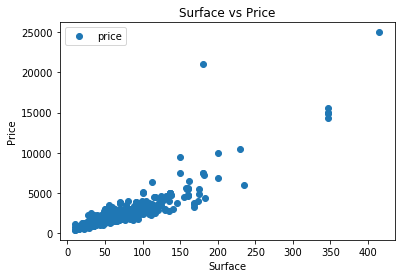

In [5]:
# plot data points on a 2-D graph 
dataset.plot(x='surface', y='price', style='o')  
plt.title('Surface vs Price')  
plt.xlabel('Surface')  
plt.ylabel('Price')  
plt.show()

C:\Users\ABONIA\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


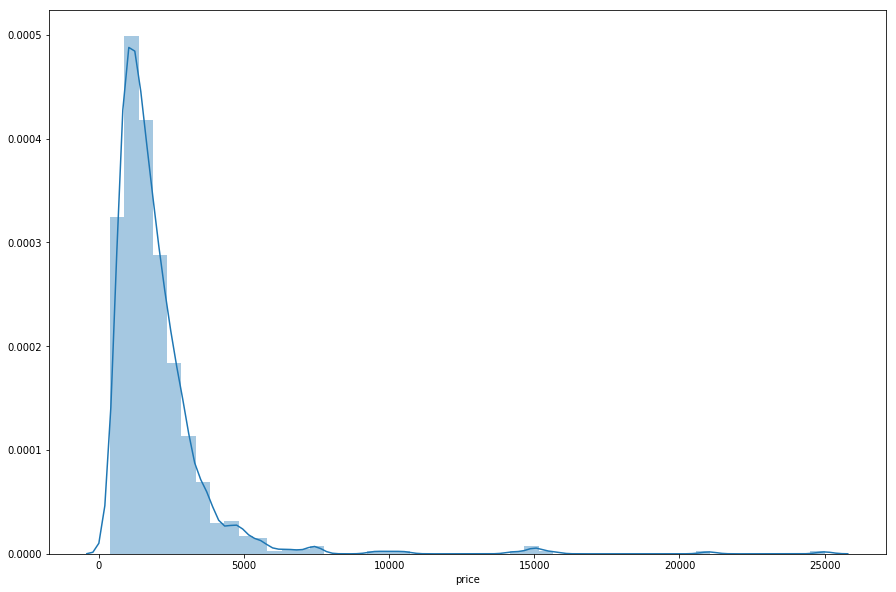

In [6]:
#Average Price is Between Nearly 0 and 5000 sq feet surface.

plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['price'])

In [10]:
dataset[:] = np.nan_to_num(dataset)
X = dataset['surface'].values.reshape(-1,1)
y = dataset['price'].values.reshape(-1,1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
#training the algorithm

regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[-148.55078831]
[[37.26014024]]


In [14]:
# To make predictions on the test data
y_pred = regressor.predict(X_test)

In [15]:
#Now compare the actual output values for X_test with the predicted values
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,2212.0,2534.179309
1,2500.0,2720.480010
2,2050.0,2087.057626
3,5000.0,4918.828285
4,930.0,522.131736
5,1740.0,1677.196084
6,758.0,736.377542
7,795.0,782.952718
8,1300.0,755.007613
9,2500.0,2832.260431


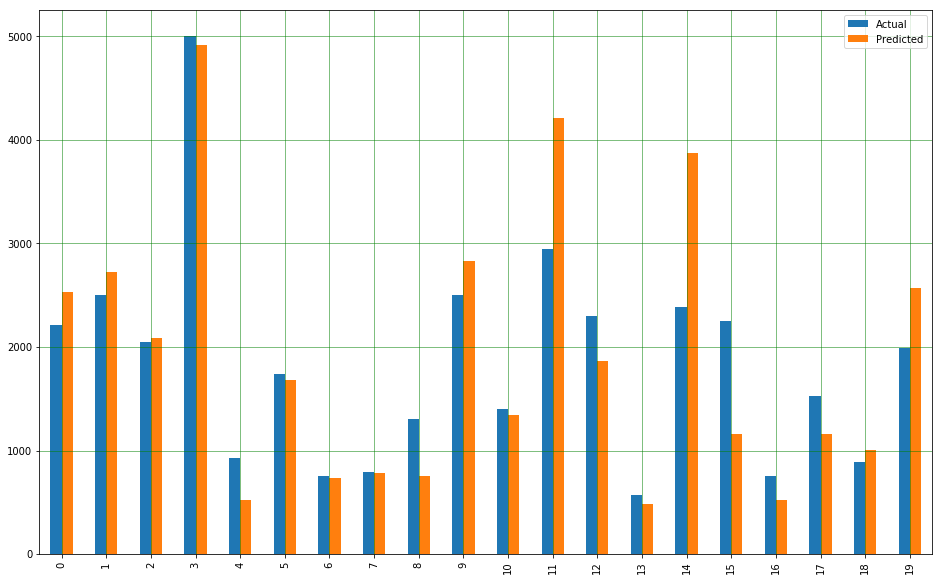

In [16]:
#visualize comparison result as a bar graph
#As the number of records is huge, for representation purpose I’m taking just 20 records
df1 = df.head(20)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

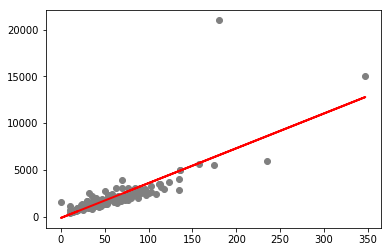

In [17]:
#plot our straight line with the test data 

plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

### Evaluate the performance of the algorithm
For regression algorithms, three evaluation metrics are commonly used:

1. Mean Absolute Error (MAE) is the mean of the absolute value of the errors. It is calculated as:
Mean Absolute Error:

\begin{align}
\text{MAE} = \frac{1}{n}\sum_{j=1}^n{(Y_j-Y_j)}
\end{align}<br>
2. Mean Squared Error (MSE) is the mean of the squared errors and is calculated as:
Mean Squared Error:

\begin{align}
\text{MSE} = \frac{1}{n}\sum_{j}^n{(Y_j-Y_j)^2}
\end{align}<br>

3. Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:
Root Mean Squared Error:

\begin{align}
\text{RMSE} = \sqrt{\frac{1}{n}\sum_{j=1}^n{(Y_j-Y_j)^2}}
\end{align}<br>

In [18]:
# evaluate the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 487.91769129808887
Mean Squared Error: 1597358.8534322046
Root Mean Squared Error: 1263.866628023782
